## Demo for Estimating Sensitivity for an Experiment
-------
This notebook shows how to simulate the expected sensitivity of an experiment given some specified background(s).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import rqpy as rp

%matplotlib inline

Let's define some typical parameters associated with an experiment.

In [2]:
vol_detector = 0.01 * 0.01 * 0.01 # 1 cm^3
time_elapsed = 1 # 1 day of data
efficiency = 0.8 # assume 80% efficiency of cuts/livetime
tm = 'Si' # assume a Silicon target mass

mass_det = rp.sim.calculate_substrate_mass(vol_detector, tm=tm) # mass of the detector in kg

energy_res = 5e-3 # energy resolution is 5 eV
threshold = 5 * energy_res # threshold if 5-sigma = 25 eV

Use `rqpy.sim.SensEst` to set up the experiment and create some backgrounds.

There are three types backgrounds we can add easily:
1. Flat background (energy independent)
2. Noise background (the expected background from noise events being triggered)
3. DM background (a WIMP background model)

If a different background function is to be inputted, one can use the `rqpy.sim.SensEst.add_arb_bkgd` method.

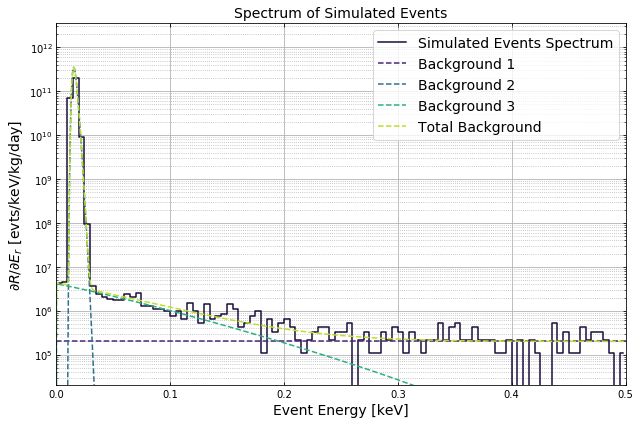

In [3]:
SE = rp.sim.SensEst(mass_det, time_elapsed, eff=efficiency, tm=tm)

# flat background of 200000 DRU
SE.add_flat_bkgd(2e5)
# noise background assuming 1024 independent samples, using the data sample rate
SE.add_noise_bkgd(energy_res, 1024, 39062.5)
# DM background for 0.5 GeV dark matter with a cross section of 1e-36 cm^2
SE.add_dm_bkgd(1, 5e-36)

gen_evts = SE.generate_background(0.5, plot_bkgd=True)

In the above figure, we can see the three different backgrounds, the total background, and the data generated.

Below, we'll reset the simulation, remake the backgrounds without including the DM background, and run the simulation.

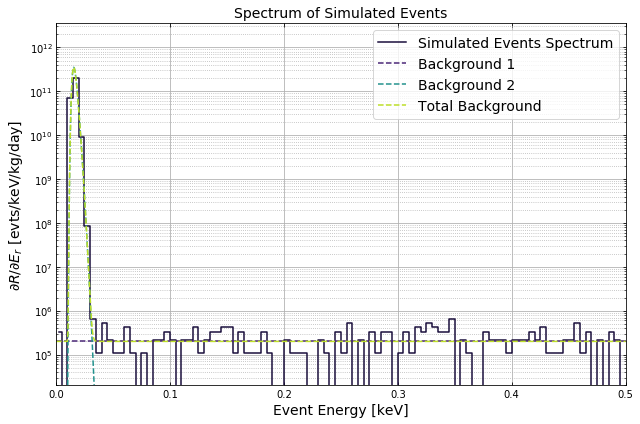

In [4]:
SE.reset_sim()

# flat background of 200000 DRU
SE.add_flat_bkgd(2e5)
# noise background assuming 1024 independent samples, using the data sample rate
SE.add_noise_bkgd(energy_res, 1024, 39062.5)

# run the simulation for 1 experiment
m_dm, sig = SE.run_sim(
    threshold,
    0.5,
    m_dms=np.geomspace(0.01, 2, num=25),
    plot_bkgd=True,
    nexp=1, # increase for a better estimate, 1 is generally used for diagnostics
)

With the simulation run, let's plot the estimated sensitivity for this (imaginary) detector.

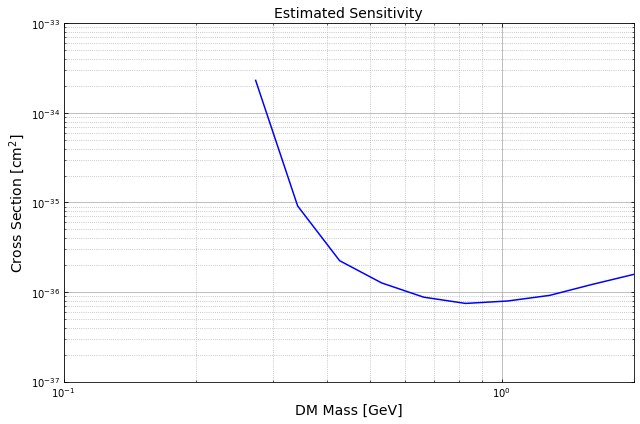

In [5]:
fig, ax = plt.subplots(figsize=(9, 6))

ax.loglog(m_dm, sig, color='b')

ax.set_ylim(1e-37, 1e-33)
ax.set_xlim(0.1, 2)
ax.set_xlabel("DM Mass [GeV]", fontsize=14)
ax.set_ylabel("Cross Section [cm$^2$]", fontsize=14)
ax.set_title("Estimated Sensitivity", fontsize=14)

ax.grid()
ax.grid(which="minor", linestyle='dotted')
ax.tick_params(which="both", direction="in", right=True, top=True)

fig.tight_layout()